In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

import pyaw.utils
from src.pyaw import rotate_vector_by_quaternion

# 11803

In [2]:
fps = [
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\IGRF\SW_OPER_MAGA_HR_1B\IGRF_SW_OPER_MAGA_HR_1B_11803_20151231T225422_20160101T002758.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_EXPT_EFIA_TCT16\SW_EXPT_EFIA_TCT16_11803_20151231T225422_20160101T002758.pkl"]


In [3]:
df_b = pd.read_pickle(fps[0])
# df_b_aux = pd.read_pickle(fps[1])
df_b_IGRF = pd.read_pickle(fps[2])
# df_e = pd.read_pickle(fps[3])

In [4]:
df_b_clip = df_b[['B_NEC', 'Longitude', 'Latitude', 'Radius', 'q_NEC_CRF']]
# df_b_aux_clip = df_b_aux[['QDLat', 'QDLon', 'MLT']]
df_b_IGRF_clip = df_b_IGRF[['B_NEC_IGRF']]
# df_e_clip = df_e[['Longitude', 'Latitude', 'Radius', 'VsatE', 'VsatN', 'Ehy', 'Ehx']]

In [5]:
from src.pyaw import SwarmPreprocess

b_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_clip['B_NEC'].values, df_b_clip['q_NEC_CRF'].values)
b_sc = b_nec2sc.calculate_rotated_vectors()

b_igrf_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_IGRF_clip['B_NEC_IGRF'].values,
                                                          df_b_clip['q_NEC_CRF'].values)
b_igrf_sc = b_igrf_nec2sc.calculate_rotated_vectors()

by = b_sc[:, 1]
by1_igrf = by - b_igrf_sc[:, 1]

In [6]:
window = 50 * 20
center = True
min_periods = 1

by_mov_ave = pyaw.utils.move_average(by, window=window, center=center, min_periods=min_periods)
by1_ma = by - by_mov_ave

In [7]:
def plot_axvline(y):
    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:06:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:06:00')), max(y) * 0.9, '06:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:10:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:10:00')), max(y) * 0.9, '10:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:20:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:20:00')), max(y) * 0.9, '20:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:25:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:25:00')), max(y) * 0.9, '25:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:53:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:53:00')), max(y) * 0.9, '53:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2015-12-31T23:57:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2015-12-31T23:57:00')), max(y) * 0.9, '57:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2016-01-01T00:07:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2016-01-01T00:07:00')), max(y) * 0.9, '07:00', color='red', rotation=90,
             ha='right', va='top')

    plt.axvline(mdates.date2num(np.datetime64('2016-01-01T00:12:00')), color='red', linestyle='--')
    plt.text(mdates.date2num(np.datetime64('2016-01-01T00:12:00')), max(y) * 0.9, '12:00', color='red', rotation=90,
             ha='right', va='top')

    return None

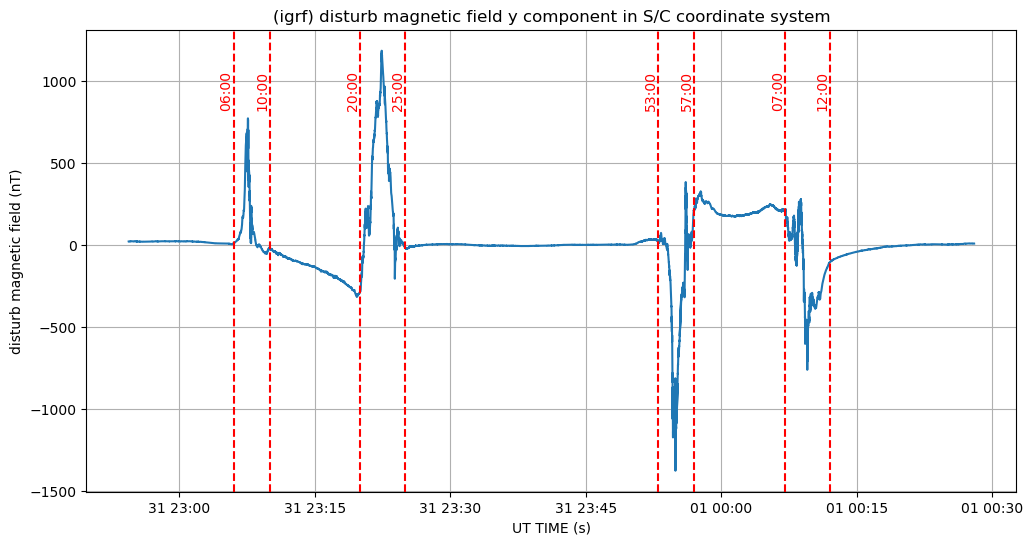

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_b_clip.index.values, by1_igrf)
plot_axvline(by1_igrf)
plt.grid()
plt.title('(igrf) disturb magnetic field y component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('disturb magnetic field (nT)')
plt.show()

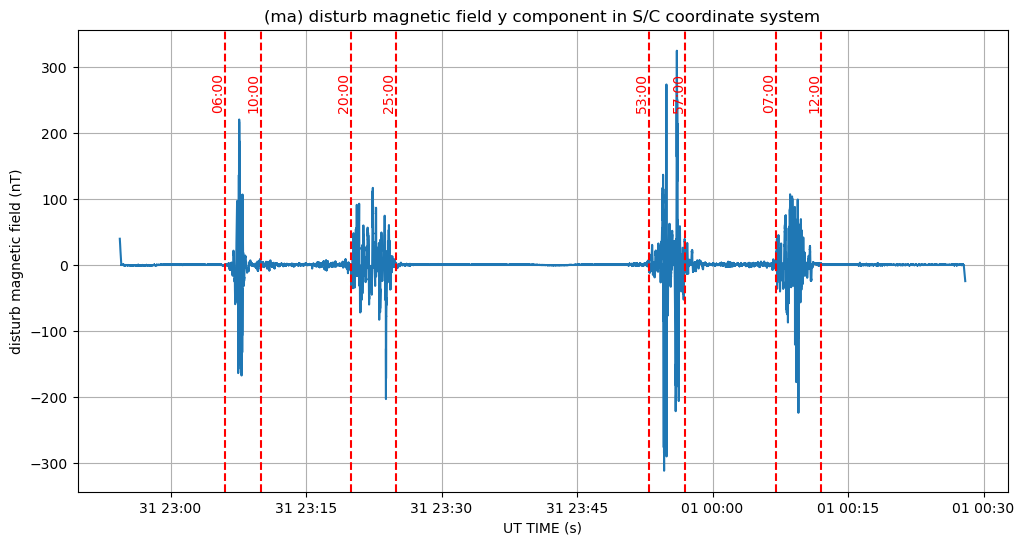

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_b_clip.index.values, by1_ma)
plot_axvline(by1_ma)
plt.grid()
plt.title('(ma) disturb magnetic field y component in S/C coordinate system')
plt.xlabel('UT TIME (s)')
plt.ylabel('disturb magnetic field (nT)')
plt.show()

# 11804

In [10]:
fps = [
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11804_20160101T002758_20160101T020133.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11804_20160101T002758_20160101T020133.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\IGRF\SW_OPER_MAGA_HR_1B\IGRF_SW_OPER_MAGA_HR_1B_11804_20160101T002758_20160101T020133.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_EXPT_EFIA_TCT16\SW_EXPT_EFIA_TCT16_11804_20160101T002758_20160101T020133.pkl"]


In [11]:
df_b = pd.read_pickle(fps[0])
# df_b_aux = pd.read_pickle(fps[1])
df_b_IGRF = pd.read_pickle(fps[2])
# df_e = pd.read_pickle(fps[3])

In [12]:
df_b_clip = df_b[['B_NEC', 'Longitude', 'Latitude', 'Radius', 'q_NEC_CRF']]
# df_b_aux_clip = df_b_aux[['QDLat', 'QDLon', 'MLT']]
df_b_IGRF_clip = df_b_IGRF[['B_NEC_IGRF']]
# df_e_clip = df_e[['Longitude', 'Latitude', 'Radius', 'VsatE', 'VsatN', 'Ehy', 'Ehx']]

In [13]:
b_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_clip['B_NEC'].values, df_b_clip['q_NEC_CRF'].values)
b_sc = b_nec2sc.calculate_rotated_vectors()

b_igrf_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_IGRF_clip['B_NEC_IGRF'].values,
                                                          df_b_clip['q_NEC_CRF'].values)
b_igrf_sc = b_igrf_nec2sc.calculate_rotated_vectors()

by = b_sc[:, 1]
by1_igrf = by - b_igrf_sc[:, 1]

In [14]:
window = 50 * 20
center = True
min_periods = 1

by_mov_ave = pyaw.utils.move_average(by, window=window, center=center, min_periods=min_periods)
by1_ma = by - by_mov_ave

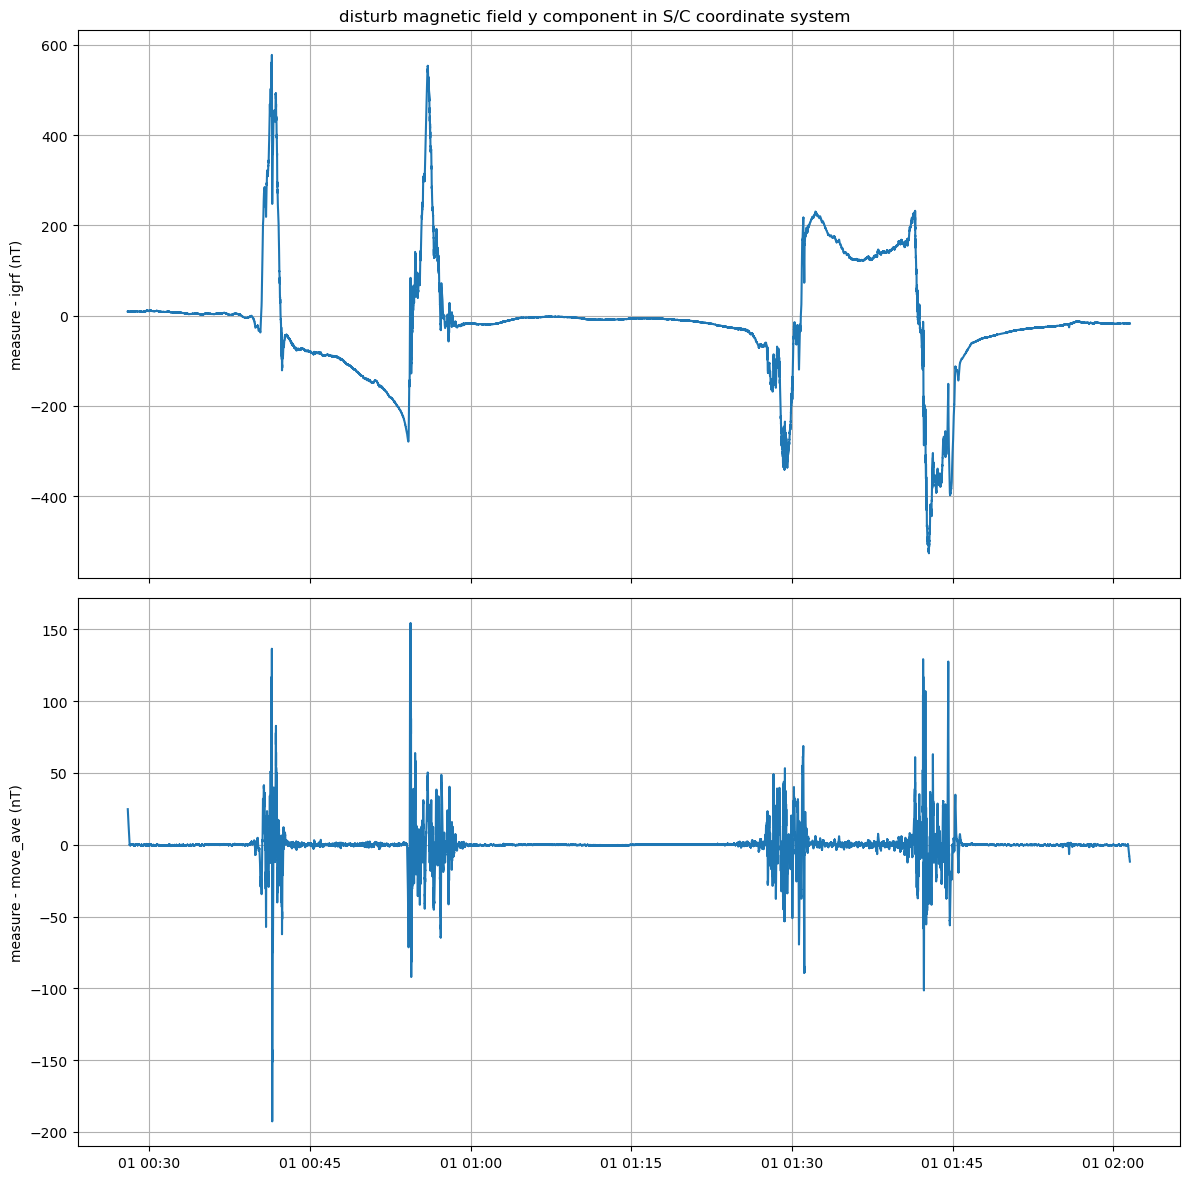

In [15]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))

plt.suptitle('disturb magnetic field y component in S/C coordinate system')

# Plot data on the first subplot
ax1.plot(df_b_clip.index.values, by1_igrf)
ax1.set_ylabel('measure - igrf (nT)')
ax1.grid(True)

# Plot data on the second subplot
ax2.plot(df_b_clip.index.values, by1_ma)
ax2.set_ylabel('measure - move_ave (nT)')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 11805

In [16]:
fps = [
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_11805_20160101T020133_20160101T033508.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\AHY9U3~9\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_11805_20160101T020133_20160101T033508.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\IGRF\SW_OPER_MAGA_HR_1B\IGRF_SW_OPER_MAGA_HR_1B_11805_20160101T020133_20160101T033508.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_EXPT_EFIA_TCT16\SW_EXPT_EFIA_TCT16_11805_20160101T020133_20160101T033508.pkl"]


In [17]:
df_b = pd.read_pickle(fps[0])
# df_b_aux = pd.read_pickle(fps[1])
df_b_IGRF = pd.read_pickle(fps[2])
# df_e = pd.read_pickle(fps[3])

In [18]:
df_b_clip = df_b[['B_NEC', 'Longitude', 'Latitude', 'Radius', 'q_NEC_CRF']]
# df_b_aux_clip = df_b_aux[['QDLat', 'QDLon', 'MLT']]
df_b_IGRF_clip = df_b_IGRF[['B_NEC_IGRF']]
# df_e_clip = df_e[['Longitude', 'Latitude', 'Radius', 'VsatE', 'VsatN', 'Ehy', 'Ehx']]

In [19]:
b_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_clip['B_NEC'].values, df_b_clip['q_NEC_CRF'].values)
b_sc = b_nec2sc.calculate_rotated_vectors()

b_igrf_nec2sc = SwarmPreprocess.MagPreprocess.NEC2SCofMAG(df_b_IGRF_clip['B_NEC_IGRF'].values,
                                                          df_b_clip['q_NEC_CRF'].values)
b_igrf_sc = b_igrf_nec2sc.calculate_rotated_vectors()

by = b_sc[:, 1]
by1_igrf = by - b_igrf_sc[:, 1]

In [20]:
window = 50 * 20
center = True
min_periods = 1

by_mov_ave = pyaw.utils.move_average(by, window=window, center=center, min_periods=min_periods)
by1_ma = by - by_mov_ave

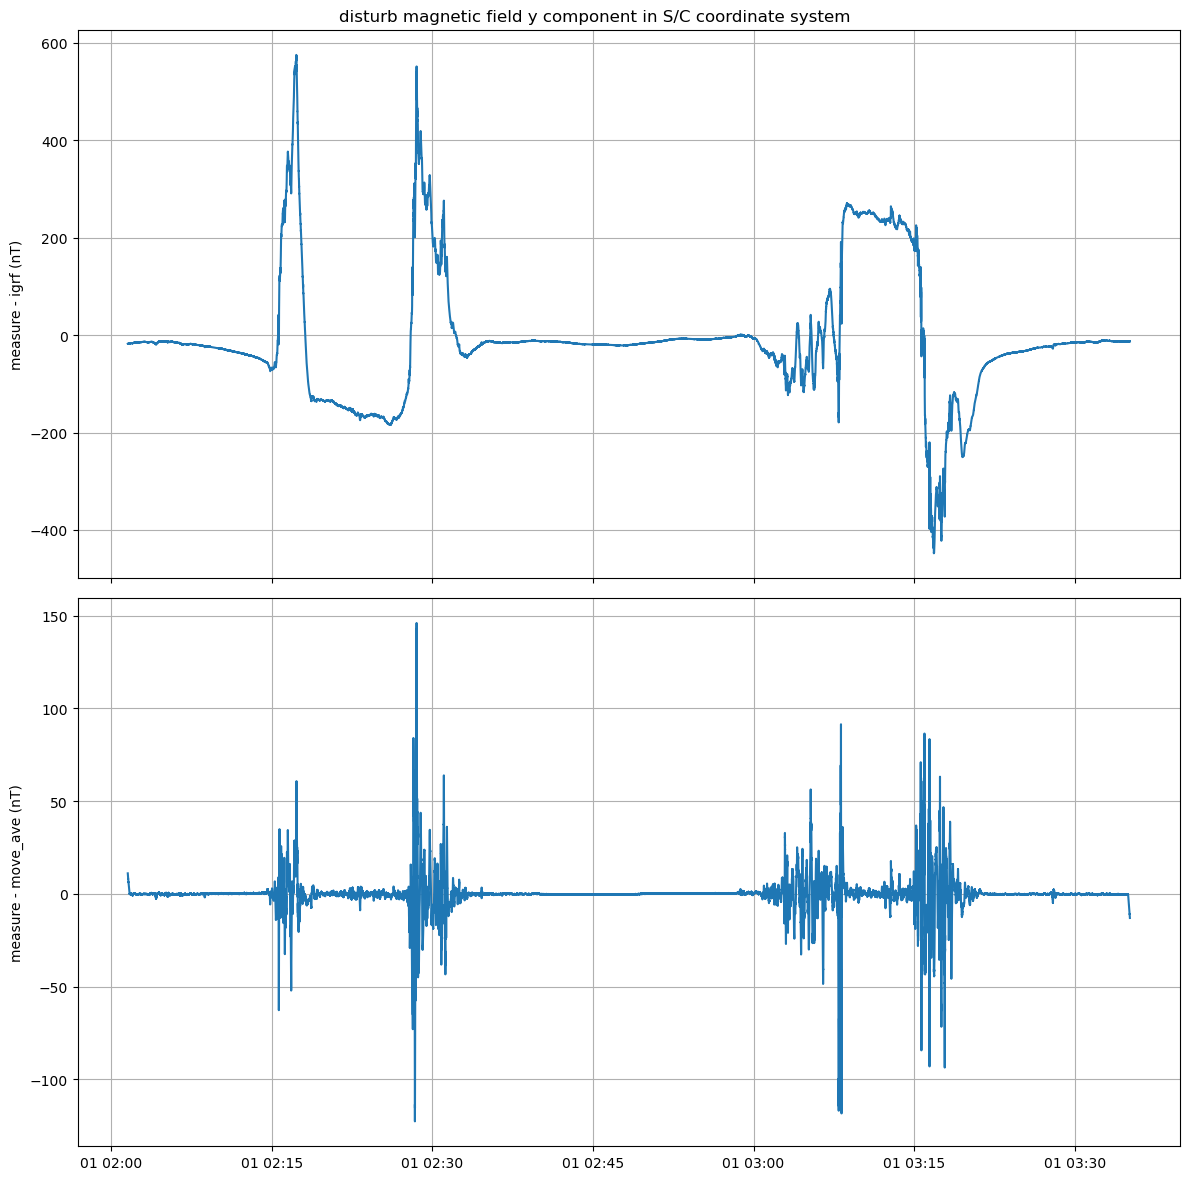

In [21]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))

plt.suptitle('disturb magnetic field y component in S/C coordinate system')

# Plot data on the first subplot
ax1.plot(df_b_clip.index.values, by1_igrf)
ax1.set_ylabel('measure - igrf (nT)')
ax1.grid(True)

# Plot data on the second subplot
ax2.plot(df_b_clip.index.values, by1_ma)
ax2.set_ylabel('measure - move_ave (nT)')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
